<a href="https://colab.research.google.com/github/Jay06eng/Machine-Learning/blob/main/Hyperparameter_Tuning_Grid_Search_Trial_1__Jay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#No hyperparameter tuning

End result shows overfitting

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


### 50,000 rows would take so long in tuning so I am just getting the first 10000 rows

In [ ]:
df = df.iloc[:10000, :]

In [ ]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
9995,2624,2,3,Suburb,2010,212304.517890
9996,2859,3,3,Urban,1963,294794.137958
9997,2065,5,1,Suburb,1976,214645.805974
9998,1914,5,3,Urban,2008,160967.263817


In [ ]:
import sklearn.preprocessing as preprocessing

df['Neighborhood'] = preprocessing.LabelEncoder().fit_transform(df['Neighborhood'])

/tmp/ipython-input-4067718723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighborhood'] = preprocessing.LabelEncoder().fit_transform(df['Neighborhood'])


In [ ]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
9995,2624,2,3,1,2010,212304.517890
9996,2859,3,3,2,1963,294794.137958
9997,2065,5,1,1,1976,214645.805974
9998,1914,5,3,2,2008,160967.263817


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

TRAINING:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

prediction from X_train

In [ ]:
# y_pred_train = model.predict(X_train)

In [ ]:
# y_pred_train

prediction from X_test

In [ ]:
# y_pred_test = model.predict(X_test)

evaluation:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Metrics
metrics = {
    "R² Score": [
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_test, y_pred_test)
    ],
    "MSE": [
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        np.sqrt(mean_squared_error(y_test, y_pred_test))
    ],
    "MAPE": [
        mean_absolute_percentage_error(y_train, y_pred_train),
        mean_absolute_percentage_error(y_test, y_pred_test)
    ]
}

# Format as DataFrame for side-by-side view
results_df = pd.DataFrame(metrics, index=["Train", "Test"]).round(4)
print(results_df)

       R² Score         MAE           MSE        RMSE    MAPE
Train    0.9301  15820.3986  4.033873e+08  20084.5041  0.0952
Test     0.4896  43515.2995  2.982604e+09  54613.2247  0.2728


#GRID SEARCH


#TRIAL 1
## Only hyperparameter tuning modified

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


### 50,000 rows would take so long in tuning so I am just getting the first 10000 rows

In [ ]:
df = df.iloc[:10000, :]

In [ ]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
9995,2624,2,3,Suburb,2010,212304.517890
9996,2859,3,3,Urban,1963,294794.137958
9997,2065,5,1,Suburb,1976,214645.805974
9998,1914,5,3,Urban,2008,160967.263817


In [ ]:
import sklearn.preprocessing as preprocessing

df['Neighborhood'] = preprocessing.LabelEncoder().fit_transform(df['Neighborhood'])

/tmp/ipython-input-4067718723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighborhood'] = preprocessing.LabelEncoder().fit_transform(df['Neighborhood'])


In [ ]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
9995,2624,2,3,1,2010,212304.517890
9996,2859,3,3,2,1963,294794.137958
9997,2065,5,1,1,1976,214645.805974
9998,1914,5,3,2,2008,160967.263817


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

TRAINING:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 0)

In [ ]:
model

RandomForestRegressor(random_state=0)

##HYPERPARAMETER TUNING

Checking the default params, there are the parameters we can use. But we do not use all or your computer will crash. You look for documentations on the model/machine learning algorithm then you can base your parameter grid there.

In this case, I will use max depth, min_samples split, and n_estimators. Note that learning rate and epochs do not apply to this, hence, looking up some documentation is really a good call.

In [ ]:
default_params = model.get_params()
default_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Now I am making my parameter grid to tune, all combinations will be tested here.

###Note: Cross Validation
CV = CROSS VALIDATION

When cv=5, the dataset is split into 5 subsets (folds), and the model is trained and evaluated five times. In each iteration, one of the folds is used as the test set, and the model is trained on the remaining four folds. This process is repeated five times, with each fold serving as the test set exactly once.

[click here to check out scikit learn documentations if you want to know further](scikit-learn.org)

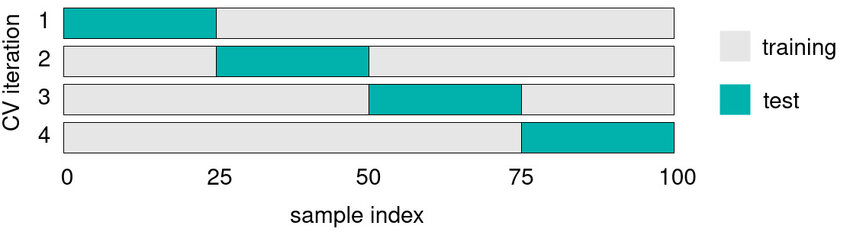

Visual is from [here](https://www.researchgate.net/figure/Visualization-of-the-k-Fold-cross-validation_fig6_369161098) by Ingo Elsen showing kfold cross validation with 4 folds

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


# Print the best hyperparameters
print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")



Best Hyperparameters:
max_depth: 10
min_samples_split: 10
n_estimators: 200


In [ ]:
best_params


{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

In [ ]:
# param_grid_comprehensive = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', 0.8]
# }

# print(param_grid_comprehensive)

In [ ]:
from sklearn.metrics import SCORERS

print("Available scoring settings:")
print(sorted(SCORERS.keys()))

The default scoring for regression models (like `RandomForestRegressor`) in `GridSearchCV`, when `scoring` is not explicitly set, is **R-squared (R²)**.

Next step is we are gonna be redifining the model with the best parameters, training, and predicting.

In [ ]:
best_model = grid_search.best_estimator_
# best_model = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200)
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

# # Predictions
# y_pred_train = best_model.predict(X_train)
# y_pred_test = best_model.predict(X_test)

# Metrics
metrics = {
    "R² Score": [
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_test, y_pred_test)
    ],
    "MSE": [
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        np.sqrt(mean_squared_error(y_test, y_pred_test))
    ],
    "MAPE": [
        mean_absolute_percentage_error(y_train, y_pred_train),
        mean_absolute_percentage_error(y_test, y_pred_test)
    ]
}

# Format as DataFrame for side-by-side view
results_df = pd.DataFrame(metrics, index=["Train", "Test"]).round(4)
print(results_df)

       R² Score         MAE           MSE        RMSE    MAPE
Train    0.7045  33157.1536  1.704629e+09  41287.1492  0.2022
Test     0.5289  41845.6536  2.752927e+09  52468.3399  0.2638
